# Drought Classification: Dataset Exploration and Evaluation Protocol

In this notebook, we work with the **US Drought Meteorological Data** datasets from Kaggle:
https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data/data and use the **already pre-split datasets** located in the following paths:
- `data/generated_data/fips_6107_drought_features_train.csv`
- `data/generated_data/fips_6107_drought_features_validation.csv`
- `data/generated_data/fips_6107_drought_features_test.csv`

Our first step is to check the **class balance** for drought severity classes (`0`, `D1`, `D2`, `D3`, `D4`, `D5`) across the training, validation, and test splits.

## Modeling and Evaluation Protocol

### 1. Baseline Model
- **Logistic Regression**: serves as a simple and interpretable baseline classifier for multi-class drought prediction.

### 2. Tree-Based Models
- **Random Forest Classifier**: useful for handling non-linear relationships and feature interactions.

### 3. Data Splitting Strategy
- The data is already split into **train**, **validation**, and **test** sets.
- The **training set** will be used for model fitting.
- The **validation set** will be used for **hyperparameter tuning** and **model selection**.
- The **test set** will be used **only once** for final evaluation.
- This ensures **no data leakage** between splits.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
paths = {
    'train': '../data/generated_data/fips_6107_drought_features_train.csv',
    'validation': '../data/generated_data/fips_6107_drought_features_validation.csv',
    'test': '../data/generated_data/fips_6107_drought_features_test.csv'
}

# Store results for plotting
all_counts = {}

for split, path in paths.items():
    df = pd.read_csv(path)
    df['score'] = df['score'].round(0).astype(int)
    class_counts = df['score'].value_counts().sort_index()
    
    all_counts[split] = class_counts
    print(f"\nClass distribution in {split} set:")
    print(class_counts)



Class distribution in train set:
score
0    309
1    127
2    135
3    153
4     14
5    149
Name: count, dtype: int64

Class distribution in validation set:
score
0    48
1    40
2     5
3     8
4     2
5     1
Name: count, dtype: int64

Class distribution in test set:
score
0    48
1    34
2    19
3     4
Name: count, dtype: int64


Classes are imbalanced, with `0` (no drought) being the most frequent class. For the test set there's not even a single instance of class `D4` or `D5`. The good sign is that all classes are represented in the training and validation sets.

<Figure size 800x500 with 0 Axes>

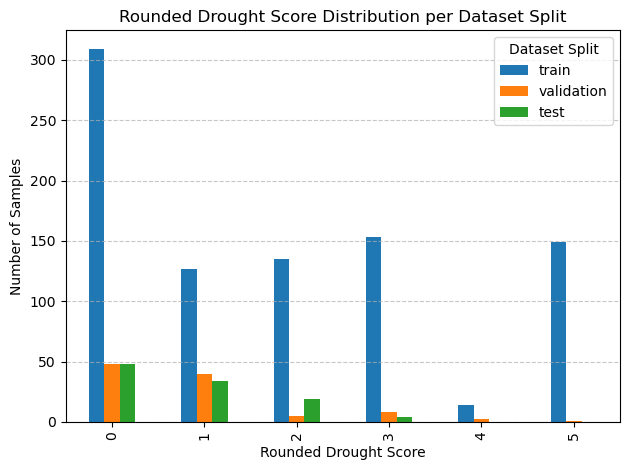

In [20]:
# Convert to DataFrame for plotting
class_counts_df = pd.DataFrame(all_counts).fillna(0).astype(int)

# Plot absolute class counts
plt.figure(figsize=(8, 5))
class_counts_df.plot(kind='bar')
plt.title('Rounded Drought Score Distribution per Dataset Split')
plt.xlabel('Rounded Drought Score')
plt.ylabel('Number of Samples')
plt.legend(title='Dataset Split')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Hyperparameter Tuning Protocol
- Use **GridSearchCV** or **RandomizedSearchCV** with **cross-validation** (5-fold) on the **training + validation data**.
- The best parameters will be selected based on the validation performance.
- The model will then be retrained on the combined training and validation sets and evaluated on the **test set**.

### 5. Evaluation Metrics
We will use the following metrics to evaluate and compare models:

1. **Accuracy** – overall correctness of predictions.
2. **F1-score** – harmonic mean of precision and recall (useful for imbalanced data).
3. **Confusion Matrix** – visual representation of class-level performance.

These metrics will be computed for both validation and test sets to assess consistency and generalization.
